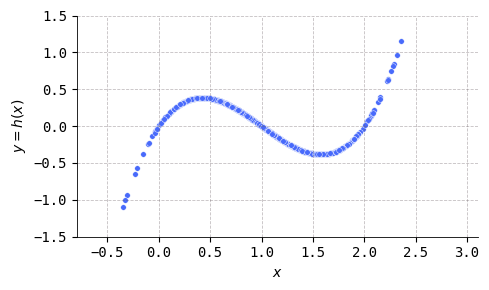

In [77]:
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import math
#import matplotlib_inline.backend_inline
import warnings
plt.style.use('./aux-files/custom_style_light.mplstyle')
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
warnings.filterwarnings('ignore')
blue = '#486AFB'
magenta = '#FD46FC'

def h(x):
    return x * (x - 1) * (x - 2)

np.random.seed(42)
linear_grid = sp.stats.norm.rvs(loc=1, scale=0.5, size=1000)
y = h(linear_grid)

sns.scatterplot(x=linear_grid, y=y)
plt.xlabel('$x$')
plt.ylabel('$y=h(x)$')
plt.ylim(-1.5, 1.5)
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

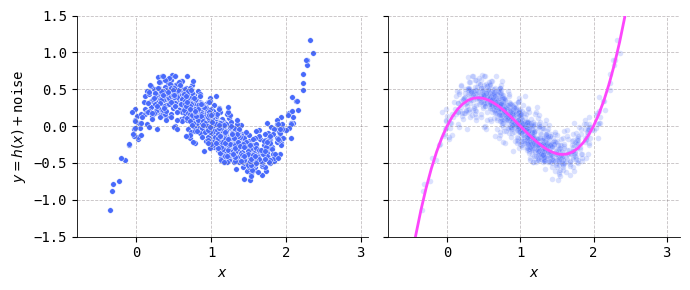

In [78]:
epsilon = sp.stats.norm.rvs(scale=0.15, size=1000)
grid = np.linspace(-0.5, 3)

_, ax = plt.subplots(ncols=2, figsize=(7, 3), sharey=True)

sns.scatterplot(x=linear_grid, y=y + epsilon, ax=ax[0])
ax[0].set_ylim(-1.5, 1.5)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y=h(x) + $noise')

sns.scatterplot(x=linear_grid, y=y + epsilon, alpha=0.2, ax=ax[1])
ax[1].plot(grid, h(grid), color='#FD46FC')
ax[1].set_xlabel('$x$')

plt.tight_layout()

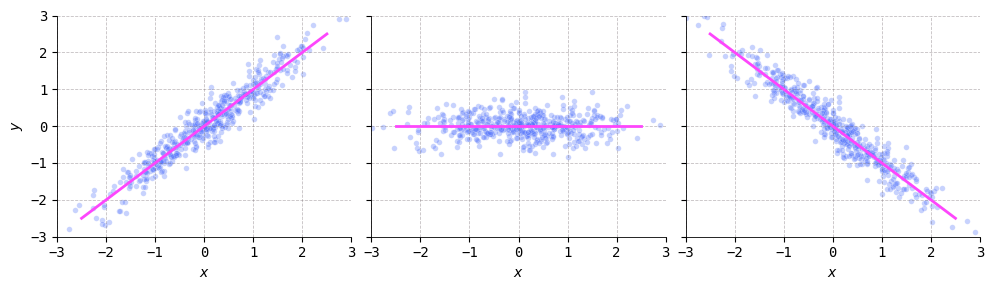

In [104]:
grid = np.linspace(-2.5, 2.5)
epsilon = sp.stats.norm.rvs(scale=0.3, size=500)
m = [1, 0, -1]
linear_grid = sp.stats.norm.rvs(size=500)
_, ax = plt.subplots(ncols=3, figsize=(10, 3), sharey=True, sharex=True)

for i, m in enumerate(m):
    y = m * linear_grid + epsilon
    sns.scatterplot(x=linear_grid, y=y, ax=ax[i], alpha=0.3)
    ax[i].plot(grid, m * grid, color='#FD46FC')
    ax[i].set_xlim(-3, 3)
    ax[i].set_ylim(-3, 3)
    ax[i].set_xlabel('$x$')
    ax[i].set_ylabel('$y$')

plt.tight_layout()

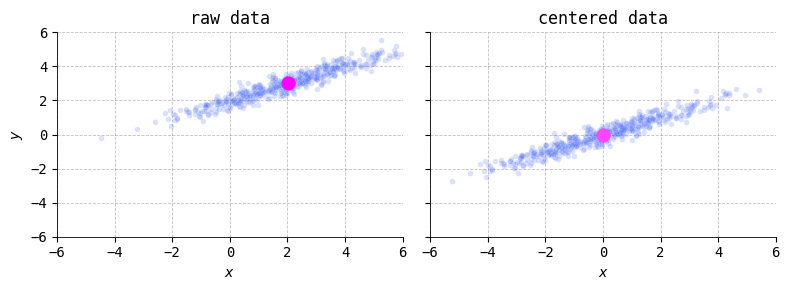

In [149]:
_, axes = plt.subplots(ncols=2, figsize=(8, 3), sharex=True, sharey=True)
np.random.seed(42)
m = 0.5

x = sp.stats.norm.rvs(loc=2, scale=2, size=500)
y = m * x + epsilon + 2
mean = (x.mean(), y.mean())
sns.scatterplot(x=x, y=y, ax=axes[0], alpha=0.2)
axes[0].scatter(mean[0], mean[1], color='magenta', zorder=3, s=100)
axes[0].set_xlim(-6, 6)
axes[0].set_ylim(-6, 6)
axes[0].set_title('raw data')
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$y$')

sns.scatterplot(x=x - mean[0], y=y - mean[1], ax=axes[1], alpha=0.2)
axes[1].scatter(0, 0, color=magenta, zorder=3, s=100)
axes[1].set_xlim(-6, 6)
axes[1].set_ylim(-6, 6)
axes[1].set_title('centered data')
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$y$')
plt.tight_layout()

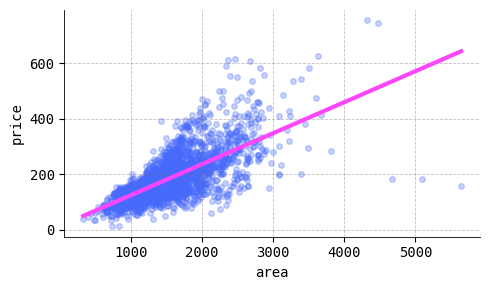

In [81]:
url = 'https://raw.githubusercontent.com/jmyers7/stats-book-materials/main/data/data-3-1.csv'
df = pd.read_csv(url, usecols=['area', 'price'])

sns.regplot(data=df, x='area', y='price', ci=None, scatter_kws={'alpha' : 0.3}, line_kws={'color' : '#FD46FC'})
plt.xlabel('area')
plt.ylabel('price')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

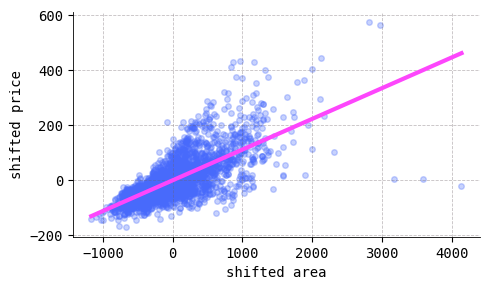

In [82]:
sns.regplot(data=df - df.mean(), x='area', y='price', ci=None, scatter_kws={'alpha' : 0.3}, line_kws={'color' : '#FD46FC'})
plt.xlabel('shifted area')
plt.ylabel('shifted price')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

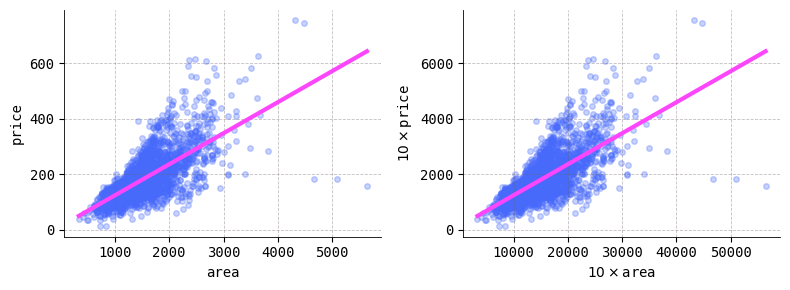

In [83]:
_, axes = plt.subplots(ncols=2, figsize=(8, 3))

sns.regplot(data=df, x='area', y='price', ci=None, scatter_kws={'alpha' : 0.3}, line_kws={'color' : '#FD46FC'}, ax=axes[0])
sns.regplot(data=df * 10, x='area', y='price', ci=None, scatter_kws={'alpha' : 0.3}, line_kws={'color' : '#FD46FC'}, ax=axes[1])
plt.xlabel('$10\\times$area')
plt.ylabel('$10 \\times$price')
plt.tight_layout()

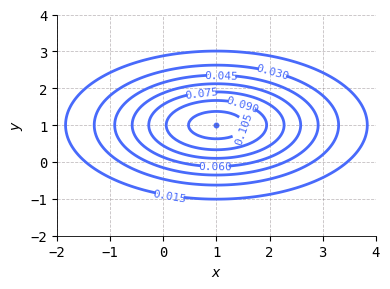

In [84]:
rho = 0.0
sigma1 = math.sqrt(2)
sigma2 = 1
Sigma = np.array([[sigma1 ** 2, rho * sigma1 * sigma2], [rho * sigma1 * sigma2, sigma2 ** 2]])
mu = np.array([1, 1])
norm = sp.stats.multivariate_normal(mean=mu, cov=Sigma)

resolution = 100
linear_grid = np.linspace(-2, 4, resolution)
x, y = np.meshgrid(linear_grid, linear_grid)
grid = np.column_stack((x.reshape(-1, 1), y.reshape(-1, 1)))
z = norm.pdf(grid)
z = z.reshape(resolution, resolution)

contour = plt.contour(linear_grid, linear_grid, z, colors=blue)
plt.clabel(contour, inline=True, fontsize=8)
plt.scatter(1, 1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.gcf().set_size_inches(w=4, h=3)
plt.tight_layout()

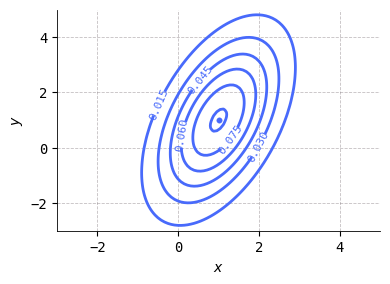

In [85]:
rho = 0.5
sigma1 = 1
sigma2 = 2
Sigma = np.array([[sigma1 ** 2, rho * sigma1 * sigma2], [rho * sigma1 * sigma2, sigma2 ** 2]])
mu = np.array([1, 1])
norm = sp.stats.multivariate_normal(mean=mu, cov=Sigma)

resolution = 100
linear_grid = np.linspace(-3, 5, resolution)
x, y = np.meshgrid(linear_grid, linear_grid)
grid = np.column_stack((x.reshape(-1, 1), y.reshape(-1, 1)))
z = norm.pdf(grid)
z = z.reshape(resolution, resolution)

contour = plt.contour(x, y, z, colors=blue)
plt.clabel(contour, inline=True, fontsize=8)
plt.scatter(1, 1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.gcf().set_size_inches(w=4, h=3)
plt.tight_layout()

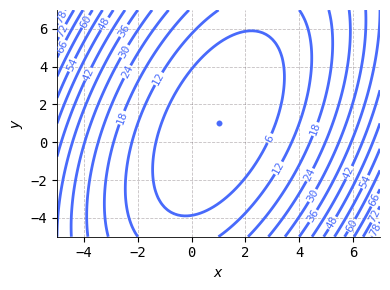

In [86]:
def mahalanobis(x, mean, cov):
    return np.diag((x - mean) @ np.linalg.inv(cov) @ (x - mean).T)

resolution = 100
linear_grid = np.linspace(-5, 7, resolution)
x, y = np.meshgrid(linear_grid, linear_grid)
grid = np.column_stack((x.reshape(-1, 1), y.reshape(-1, 1)))
z = mahalanobis(x=grid, mean=mu, cov=Sigma)
z = z.reshape(resolution, resolution)

contour = plt.contour(x, y, z, colors=blue, levels=15)
plt.clabel(contour, inline=True, fontsize=8)
plt.scatter(1, 1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.gcf().set_size_inches(w=4, h=3)
plt.tight_layout()

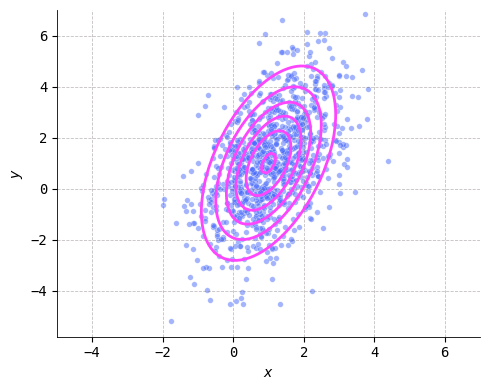

In [87]:
rho = 0.5
sigma1 = 1
sigma2 = 2
Sigma = np.array([[sigma1 ** 2, rho * sigma1 * sigma2], [rho * sigma1 * sigma2, sigma2 ** 2]])
mu = np.array([1, 1])
norm = sp.stats.multivariate_normal(mean=mu, cov=Sigma)

np.random.seed(42)
sample = norm.rvs(size=1000)

resolution = 100
linear_grid = np.linspace(-5, 7, resolution)
x, y = np.meshgrid(linear_grid, linear_grid)
grid = np.column_stack((x.reshape(-1, 1), y.reshape(-1, 1)))
z = norm.pdf(grid)
z = z.reshape(resolution, resolution)

sns.scatterplot(x=sample[:, 0], y=sample[:, 1], alpha=0.5)
plt.contour(x, y, z, colors=magenta, alpha=1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.gcf().set_size_inches(w=5, h=4)
plt.tight_layout()

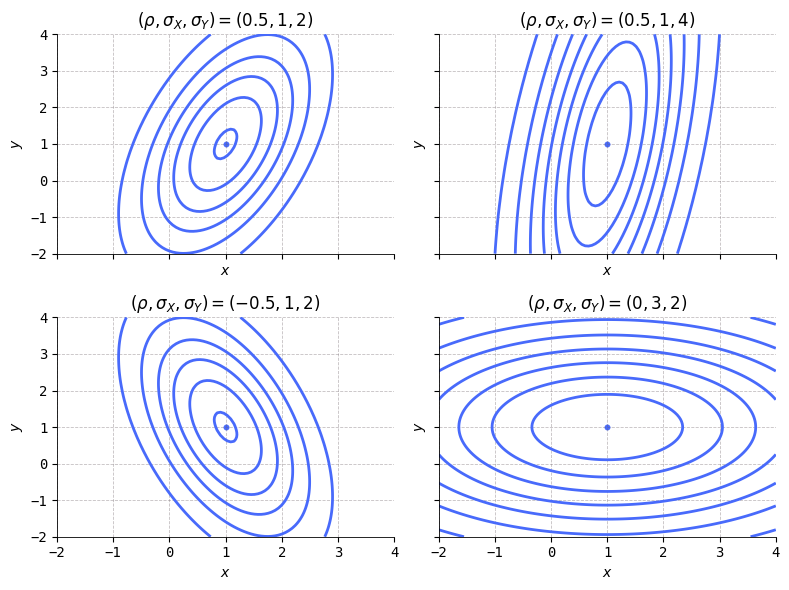

In [88]:
def covar_matrix(rho, sigma1, sigma2):
    return np.array([[sigma1 ** 2, rho * sigma1 * sigma2], [rho * sigma1 * sigma2, sigma2 ** 2]])

parameters = [[0.5, 1, 2], [0.5, 1, 4], [-0.5, 1, 2], [0, 3, 2]]   # rho, sigma1, sigma2

resolution = 100
linear_grid = np.linspace(-2, 4, resolution)
x, y = np.meshgrid(linear_grid, linear_grid)
grid = np.column_stack((x.reshape(-1, 1), y.reshape(-1, 1)))

_, axes = plt.subplots(ncols=2, nrows=2, figsize=(8, 6), sharex=True, sharey=True)

for parameter, axis in zip(parameters, axes.flatten()):
    Sigma = covar_matrix(*parameter)
    rho, sigma1, sigma2 = parameter
    norm = sp.stats.multivariate_normal(mean=np.array([1, 1]), cov=Sigma)

    z = norm.pdf(grid)
    z = z.reshape(resolution, resolution)
    axis.contour(x, y, z, colors=blue)
    axis.scatter(1, 1)
    axis.set_xlabel('$x$')
    axis.set_ylabel('$y$')
    axis.set_title(f'$(\\rho,\\sigma_X,\\sigma_Y)=({rho},{sigma1},{sigma2})$')
    
plt.tight_layout()
    